# Задание 1

In [329]:
# https://scikit-learn.org/stable/install.html

!pip install scikit-learn

In [330]:
import pandas as pd

dataset = pd.read_csv('balanced_bank_preprocessed.csv')
del dataset['Unnamed: 0']

In [331]:
dataset.head()

,age,job_cl,marital_cl,education_cl,default_cl,housing_cl,loan_cl,contact_cl,month_cl,day_of_week_cl,...,campaign,pdays,previous,poutcome_cl,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_cl
0,35,0,1,0,0,0,0,0,2,3,...,1,999,1,1,-1.8,92.893,-46.2,1.266,5099.1,0
1,42,2,0,3,0,1,0,1,2,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,1
2,36,0,0,0,0,1,0,0,5,0,...,2,999,0,0,1.4,93.444,-36.1,4.965,5228.1,1
3,37,0,0,1,0,0,1,1,4,2,...,2,999,0,0,1.4,93.918,-42.7,4.963,5228.1,1
4,31,4,1,0,0,0,0,0,1,3,...,1,999,0,0,-1.8,93.075,-47.1,1.365,5099.1,0


In [332]:
dataset["job_cl"].unique()

array([ 0,  2,  4,  1,  5,  3,  6, 11, 10,  9,  8,  7])

In [333]:
dataset_2 = dataset.drop(['marital_cl',
                                  'education_cl', 'default_cl',\
                                  'housing_cl', 'loan_cl',\
                                  'contact_cl', 'month_cl',\
                                  'day_of_week_cl', 'job_cl',\
                                  'poutcome_cl'], axis=1)

In [334]:
X = dataset_2.iloc[:, :-1].values
y = dataset["y_cl"]

In [335]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) # Разбитие на обучающие и тестовые выборки

In [336]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

# Стандартизация и подготовка данных

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test) 

In [337]:
X_train

array([[ 1.36036634, -0.61851464, -0.13385853, ...,  0.70789338,
         1.00996634,  0.64792139],
       [-0.12769059, -0.73000431, -0.13385853, ...,  0.70789338,
         1.01155294,  0.64792139],
       [ 1.19502668, -0.75787673, -0.58009369, ...,  2.47777741,
        -1.16790762, -1.34627454],
       ...,
       [-0.45836991, -1.03660091,  2.98978761, ...,  0.76378446,
         1.0665551 ,  1.074346  ],
       [ 0.20298873,  1.63357674, -0.13385853, ..., -1.11788172,
        -0.88919476, -0.40837029],
       [-0.54103974, -0.28683286,  0.31237664, ...,  0.50295944,
        -1.09386626, -1.96579708]])

# Классификация

**Классификация** — один из разделов машинного обучения, посвященный решению следующей задачи. Имеется множество объектов (ситуаций), разделённых некоторым образом на классы. Задано конечное множество объектов, для которых известно, к каким классам они относятся. Это множество называется обучающей выборкой. Классовая принадлежность остальных объектов не известна. Требуется построить алгоритм, способный классифицировать произвольный объект из исходного множества.

**Классифицировать объект** — значит, указать номер (или наименование класса), к которому относится данный объект.


## Формальные постановки задачи классификации

### **Классическая постановка**
Пусть $X$ — множество описаний объектов, $Y$ — конечное множество номеров (имён, меток) классов. Существует неизвестная целевая зависимость — отображение $y^{*}:\; X\to Y$, значения которой известны только на объектах конечной обучающей выборки $X^m = \{(x_1,y_1),\dots,(x_m,y_m)\}$. Требуется построить алгоритм $a:\; X\to Y$, способный классифицировать произвольный объект $x \in X$.

### **Вероятностная постановка**
Более общей считается вероятностная постановка задачи. Предполагается, что множество пар «объект, класс» $X \times Y$ является вероятностным пространством с неизвестной вероятностной мерой $\mathsf P$. Имеется конечная обучающая выборка наблюдений $X^m = \{(x_1,y_1),\dots,(x_m,y_m)\}$, сгенерированная согласно вероятностной мере $\mathsf P$. Требуется построить алгоритм $a:\; X\to Y$, способный классифицировать произвольный объект $x \in X$.

## Метод k-ближайших соседей (K-Nearest Neighbors)

Этот метод работает с помощью поиска кратчайшей дистанции между тестируемым объектом и ближайшими к нему классифицированным объектами из обучающего набора. Классифицируемый объект будет относится к тому классу, к которому принадлежит ближайший объект набора.

https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

In [338]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=21)
clf.fit(X_train, y_train) # алгоритм оценки для классификатора

KNeighborsClassifier(n_neighbors=21)

In [339]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

[[812 160]
 [ 85 799]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       972
           1       0.83      0.90      0.87       884

    accuracy                           0.87      1856
   macro avg       0.87      0.87      0.87      1856
weighted avg       0.87      0.87      0.87      1856



## Классификатор дерева решений (Decision Tree Classifier)

Этот классификатор разбивает данные на всё меньшие и меньшие подмножества на основе разных критериев, т. е. у каждого подмножества своя сортирующая категория. С каждым разделением количество объектов определённого критерия уменьшается.

Классификация подойдёт к концу, когда сеть дойдёт до подмножества только с одним объектом. Если объединить несколько подобных деревьев решений, то получится так называемый Случайный Лес (англ. Random Forest).

https://stackabuse.com/decision-trees-in-python-with-scikit-learn/

In [340]:
# https://scikit-learn.org/stable/modules/tree.html
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [341]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[831 141]
 [148 736]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       972
           1       0.84      0.83      0.84       884

    accuracy                           0.84      1856
   macro avg       0.84      0.84      0.84      1856
weighted avg       0.84      0.84      0.84      1856



## Наивный байесовский классификатор (Naive Bayes)

Такой классификатор вычисляет вероятность принадлежности объекта к какому-то классу. Эта вероятность вычисляется из шанса, что какое-то событие произойдёт, с опорой на уже на произошедшие события.

Каждый параметр классифицируемого объекта считается независимым от других параметров.

https://stackabuse.com/the-naive-bayes-algorithm-in-python-with-scikit-learn/

In [342]:
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [343]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[807 165]
 [232 652]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       972
           1       0.80      0.74      0.77       884

    accuracy                           0.79      1856
   macro avg       0.79      0.78      0.78      1856
weighted avg       0.79      0.79      0.79      1856



## Метод опорных векторов (Support Vector Machines)

Работа метода опорных векторов заключается в рисовании линии между разными кластерами точек, которые нужно сгруппировать в классы. С одной стороны линии будут точки, принадлежащие одному классу, с другой стороны — к другому классу.

Классификатор будет пытаться увеличить расстояние между рисуемыми линиями и точками на разных сторонах, чтобы увеличить свою «уверенность» определения класса. Когда все точки построены, сторона, на которую они падают — это класс, которому эти точки принадлежат.

https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

In [344]:
# https://scikit-learn.org/stable/modules/svm.html
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [345]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[793 179]
 [ 58 826]]
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       972
           1       0.82      0.93      0.87       884

    accuracy                           0.87      1856
   macro avg       0.88      0.88      0.87      1856
weighted avg       0.88      0.87      0.87      1856



## Логистическая регрессия (Logistic Regression)




Логистическая регрессия выводит прогнозы о точках в бинарном масштабе — нулевом или единичном. Если значение чего-либо равно либо больше 0.5, то объект классифицируется в большую сторону (к единице). Если значение меньше 0.5 — в меньшую (к нулю).

У каждого признака есть своя метка, равная только 0 или только 1. Логистическая регрессия является линейным классификатором и поэтому используется, когда в данных прослеживается какая-то линейная зависимость.

https://ru.wikipedia.org/wiki/Логистическая_регрессия

In [346]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [347]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[817 155]
 [130 754]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       972
           1       0.83      0.85      0.84       884

    accuracy                           0.85      1856
   macro avg       0.85      0.85      0.85      1856
weighted avg       0.85      0.85      0.85      1856



## from sklearn.linear_model import Perceptron

In [348]:
from sklearn.linear_model import Perceptron

clf = Perceptron()
clf.fit(X_train, y_train)

Perceptron()

# Разделение выборки

In [349]:
import pandas as pd

dataset = pd.read_csv('balanced_bank_preprocessed.csv')
del dataset['Unnamed: 0']

In [350]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [351]:
from sklearn.model_selection import train_test_split

from collections import Counter

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(Counter(y_train).values())
print(Counter(y_test).values())

dict_values([6210, 1214])
dict_values([289, 1567])


In [352]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)
print(Counter(y_train).values())
print(Counter(y_test).values())

dict_values([6222, 1202])
dict_values([1555, 301])


# Кросс-валидация

In [353]:
import pandas as pd

dataset = pd.read_csv('balanced_bank_preprocessed.csv')
del dataset['Unnamed: 0']

In [354]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [355]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(X, y):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

TRAIN: [1628 1638 1642 ... 9277 9278 9279] TEST: [   0    1    2 ... 1890 1891 1892]
TRAIN: [   0    1    2 ... 9277 9278 9279] TEST: [1628 1638 1642 ... 3750 3751 3752]
TRAIN: [   0    1    2 ... 9277 9278 9279] TEST: [3493 3496 3506 ... 5575 5577 5578]
TRAIN: [   0    1    2 ... 9277 9278 9279] TEST: [5539 5554 5557 ... 7441 7443 7444]
TRAIN: [   0    1    2 ... 7441 7443 7444] TEST: [7261 7295 7301 ... 9277 9278 9279]


In [356]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  clf = KNeighborsClassifier(n_neighbors=5)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  print(clf.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1556
           1       0.44      0.20      0.27       300

    accuracy                           0.83      1856
   macro avg       0.65      0.57      0.59      1856
weighted avg       0.79      0.83      0.80      1856

0.8292025862068966
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1556
           1       0.42      0.17      0.24       300

    accuracy                           0.83      1856
   macro avg       0.64      0.56      0.57      1856
weighted avg       0.79      0.83      0.80      1856

0.8270474137931034
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1555
           1       0.40      0.18      0.25       301

    accuracy                           0.82      1856
   macro avg       0.63      0.56      0.58      1856
weighted avg       0.78      0.82   

# Подбор гиперпараметров

In [357]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
import numpy as np

from sklearn.neighbors import KNeighborsClassifier

parameters = { 'n_neighbors': np.arange(1, 21, 1) }

knn = KNeighborsClassifier()

clf = GridSearchCV(knn, parameters)

clf.fit(X_train, y_train)

clf.best_params_

clf.cv_results_

{'mean_fit_time': array([0.00495586, 0.00192232, 0.00205564, 0.0020216 , 0.00224204,
        0.00211134, 0.00566378, 0.00204229, 0.0042737 , 0.00287914,
        0.00263686, 0.00200214, 0.00384493, 0.0020288 , 0.00208282,
        0.00208845, 0.00235472, 0.00206647, 0.0034668 , 0.00145698]),
 'mean_score_time': array([0.37360129, 0.30471354, 0.32165308, 0.43023062, 0.418891  ,
        0.42927413, 0.58850412, 0.48966079, 0.49551854, 0.413726  ,
        0.44030266, 0.41205454, 0.41084824, 0.44891829, 0.39071465,
        0.34593344, 0.40344505, 0.40958495, 0.41466217, 0.25450497]),
 'mean_test_score': array([0.78717616, 0.83028007, 0.81236489, 0.82906759, 0.8186974 ,
        0.83055006, 0.82758737, 0.83418779, 0.82758692, 0.83297449,
        0.82920317, 0.8316276 , 0.8290684 , 0.83310953, 0.83176228,
        0.83391716, 0.83283972, 0.83553359, 0.83405184, 0.835399  ]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
                    17, 18,

In [358]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(clf.score(X_test, y_test))

[[1537   18]
 [ 290   11]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1555
           1       0.38      0.04      0.07       301

    accuracy                           0.83      1856
   macro avg       0.61      0.51      0.49      1856
weighted avg       0.77      0.83      0.77      1856

0.834051724137931


# Задание 2

In [359]:
from sklearn.metrics import accuracy_score, recall_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [360]:
Loss = ({'model' : [], 'test_accuracy' : [], 'test_recall' :[] , 'test_auc' :[]}) #Датафрейм для метрик качества
df_Loss = pd.DataFrame(Loss)

In [361]:
X = dataset_2.iloc[:, :-1].values
y = dataset["y_cl"]

In [362]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) # Разбитие на обучающие и тестовые выборки

In [363]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test) 

In [364]:
def loss_func(df, model, y_test, y_pred):  # функция потерь (для оценки качества обученной модели)
  te_ac = accuracy_score(y_test, y_pred).round(4) # Точность
  te_rec = recall_score(y_test, y_pred).round(4) # Отзыв
  te_auc = roc_auc_score(y_test, y_pred).round(4)
  new_row = {'model' : model, 'test_accuracy' : te_ac, 'test_recall' : te_rec, 'test_auc' : te_auc}
  df = df.append(new_row, ignore_index = True)
  return df

## KNN

In [365]:
def KNN(X_train, X_test, y_train, k_neighbors):
  y_pred_knn = []
  y_train = np.array(y_train)
  for test_value in X_test: 
    min_metric = [] # Минимальное расстояние между векторами
    for i in range(len(X_train)):
      min_metric.append((np.sqrt(np.sum((test_value - X_train[i])**2)), y_train[i]))
    m = sorted(min_metric)[:k_neighbors]
    first_class = 0
    second_class = 0
    for i in range(len(m)):
      if m[i][1] == 1:
        first_class += 1
        continue
      second_class += 1
    if first_class > second_class:
      y_pred_knn.append(1)
      continue
    y_pred_knn.append(0)
  return y_pred_knn

In [367]:
y_pred_knn = KNN(X_train, X_test, y_train, 21)
loss_func(df_Loss, "KNN", y_test, y_pred_knn)

,model,test_accuracy,test_recall,test_auc
0,KNN,0.8669,0.8852,0.867


## Naive Bayes

### Гауссовский наивный байесовский классификатор

В гауссовском наивном байесовском методе предполагается, что непрерывные значения, связанные с каждым признаком, распределены в соответствии с гауссовым распределением. При построении он дает кривую в форме колокола, которая симметрична относительно среднего значения признаков, как показано ниже:

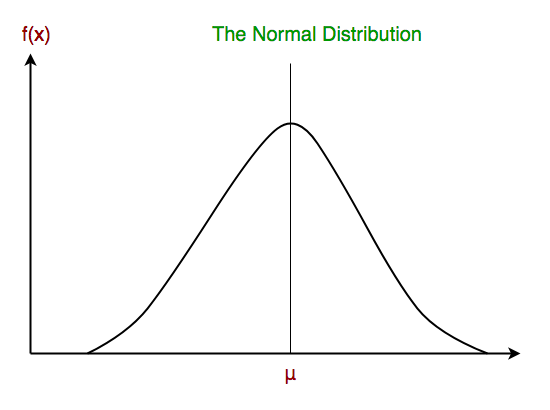

In [368]:
from IPython.display import Image
Image('naive-bayes-classification-1.png')

In [369]:
# обучение модели на тренировочном наборе
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
 
# делать прогнозы на тестовом наборе
y_pred_NB = gnb.predict(X_test)
 
# сравнение фактических значений ответа (y_test) с прогнозируемыми значениями ответа (y_pred)
loss_func(df_Loss, "Naive Bayes", y_test, y_pred_NB)

,model,test_accuracy,test_recall,test_auc
0,Naive Bayes,0.792,0.7584,0.7918


# Результаты

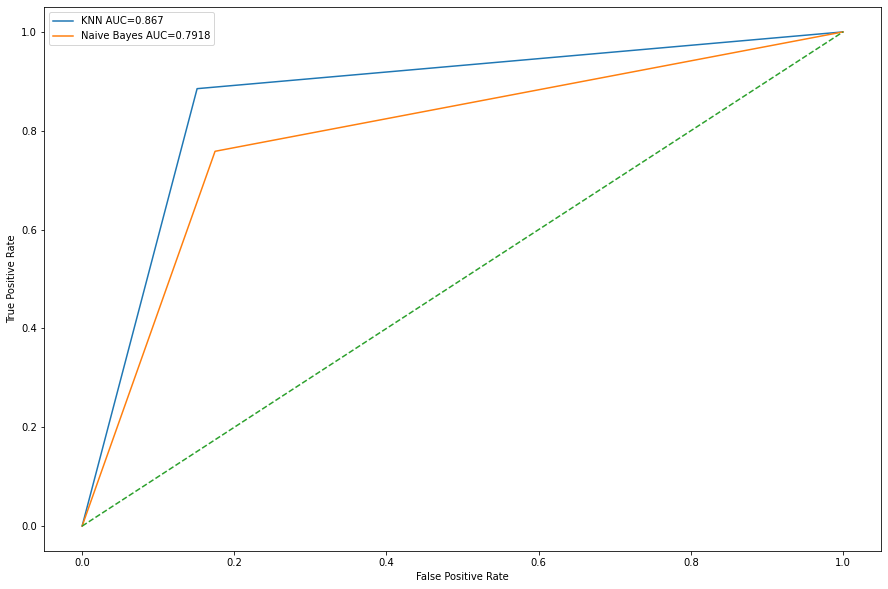

In [371]:
plt.figure(figsize = (15,10))
models = ['KNN', 'Naive Bayes']
y_native = []
y_native.append(y_pred_knn)
y_native.append(y_pred_NB)
for n in range(len(y_native)):
    fpr, tpr, _ = roc_curve(y_test, y_native[n])
    auc = roc_auc_score(y_test, y_native[n])
    lw = 1.5
    plt.plot(fpr,tpr,label=str(models[n])+" AUC="+str(auc.round(4)),lw=lw)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=0)
plt.show()